## Problem1

Officeworks is a leading retail store in Australia, with numerous outlets around the country. The manager would like to improve the customer experience by providing them online predictive prices for their laptops if they want to sell them. To improve this experience the manager would like us to build a model which is sustainable and accurate enough. Apply Lasso and Ridge Regression model on the dataset and predict the price, given other attributes. Tabulate R squared, RMSE, and correlation values.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('Computer_Data (1).csv')

In [4]:
df

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,35


In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
df.shape

(6259, 10)

In [11]:
df.describe(exclude = ["number"])

,cd,multi,premium
count,6259,6259,6259
unique,2,2,2
top,no,no,yes
freq,3351,5386,5647


In [6]:
df.dtypes

Unnamed: 0     int64
price          int64
speed          int64
hd             int64
ram            int64
screen         int64
cd            object
multi         object
premium       object
ads            int64
trend          int64
dtype: object

In [14]:
df.select_dtypes(include=["object"])

,cd,multi,premium
0,no,no,yes
1,no,no,yes
2,no,no,yes
3,no,no,no
4,no,no,yes
...,...,...,...
6254,no,no,yes
6255,yes,yes,yes
6256,yes,no,yes
6257,yes,no,yes


In [16]:
from sklearn.preprocessing import LabelEncoder
# define one hot encoding
encoder = LabelEncoder()
# transform data
df['cd']= encoder.fit_transform(df.cd)
df['multi']= encoder.fit_transform(df.multi)
df['premium']= encoder.fit_transform(df.premium)

In [18]:
df.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,0,0,1,94,1
1,1795,33,85,2,14,0,0,1,94,1
2,1595,25,170,4,15,0,0,1,94,1
3,1849,25,170,8,14,0,0,0,94,1
4,3295,33,340,16,14,0,0,1,94,1


In [72]:
df[df.duplicated()]

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
135,2195,25,245,8,14,0,0,1,95,2
186,1695,33,170,4,14,0,0,1,95,2
251,1499,25,170,4,14,0,0,1,100,3
352,2595,50,250,8,15,0,0,1,108,4
701,2099,33,120,4,14,0,0,0,176,6
...,...,...,...,...,...,...,...,...,...,...
4780,1945,50,528,8,14,1,0,1,162,22
4787,1999,66,420,8,14,1,1,1,162,22
4836,1995,66,528,8,14,1,0,1,162,22
4953,1895,66,528,8,14,1,0,1,191,23


In [74]:
df.drop_duplicates(keep='first',inplace=True)

In [76]:
df[df.duplicated()]

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend


<AxesSubplot:>

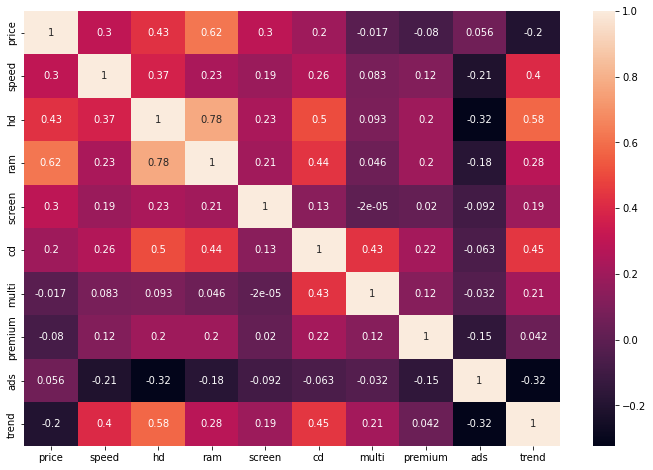

In [77]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.heatmap(df.corr(), annot=True)

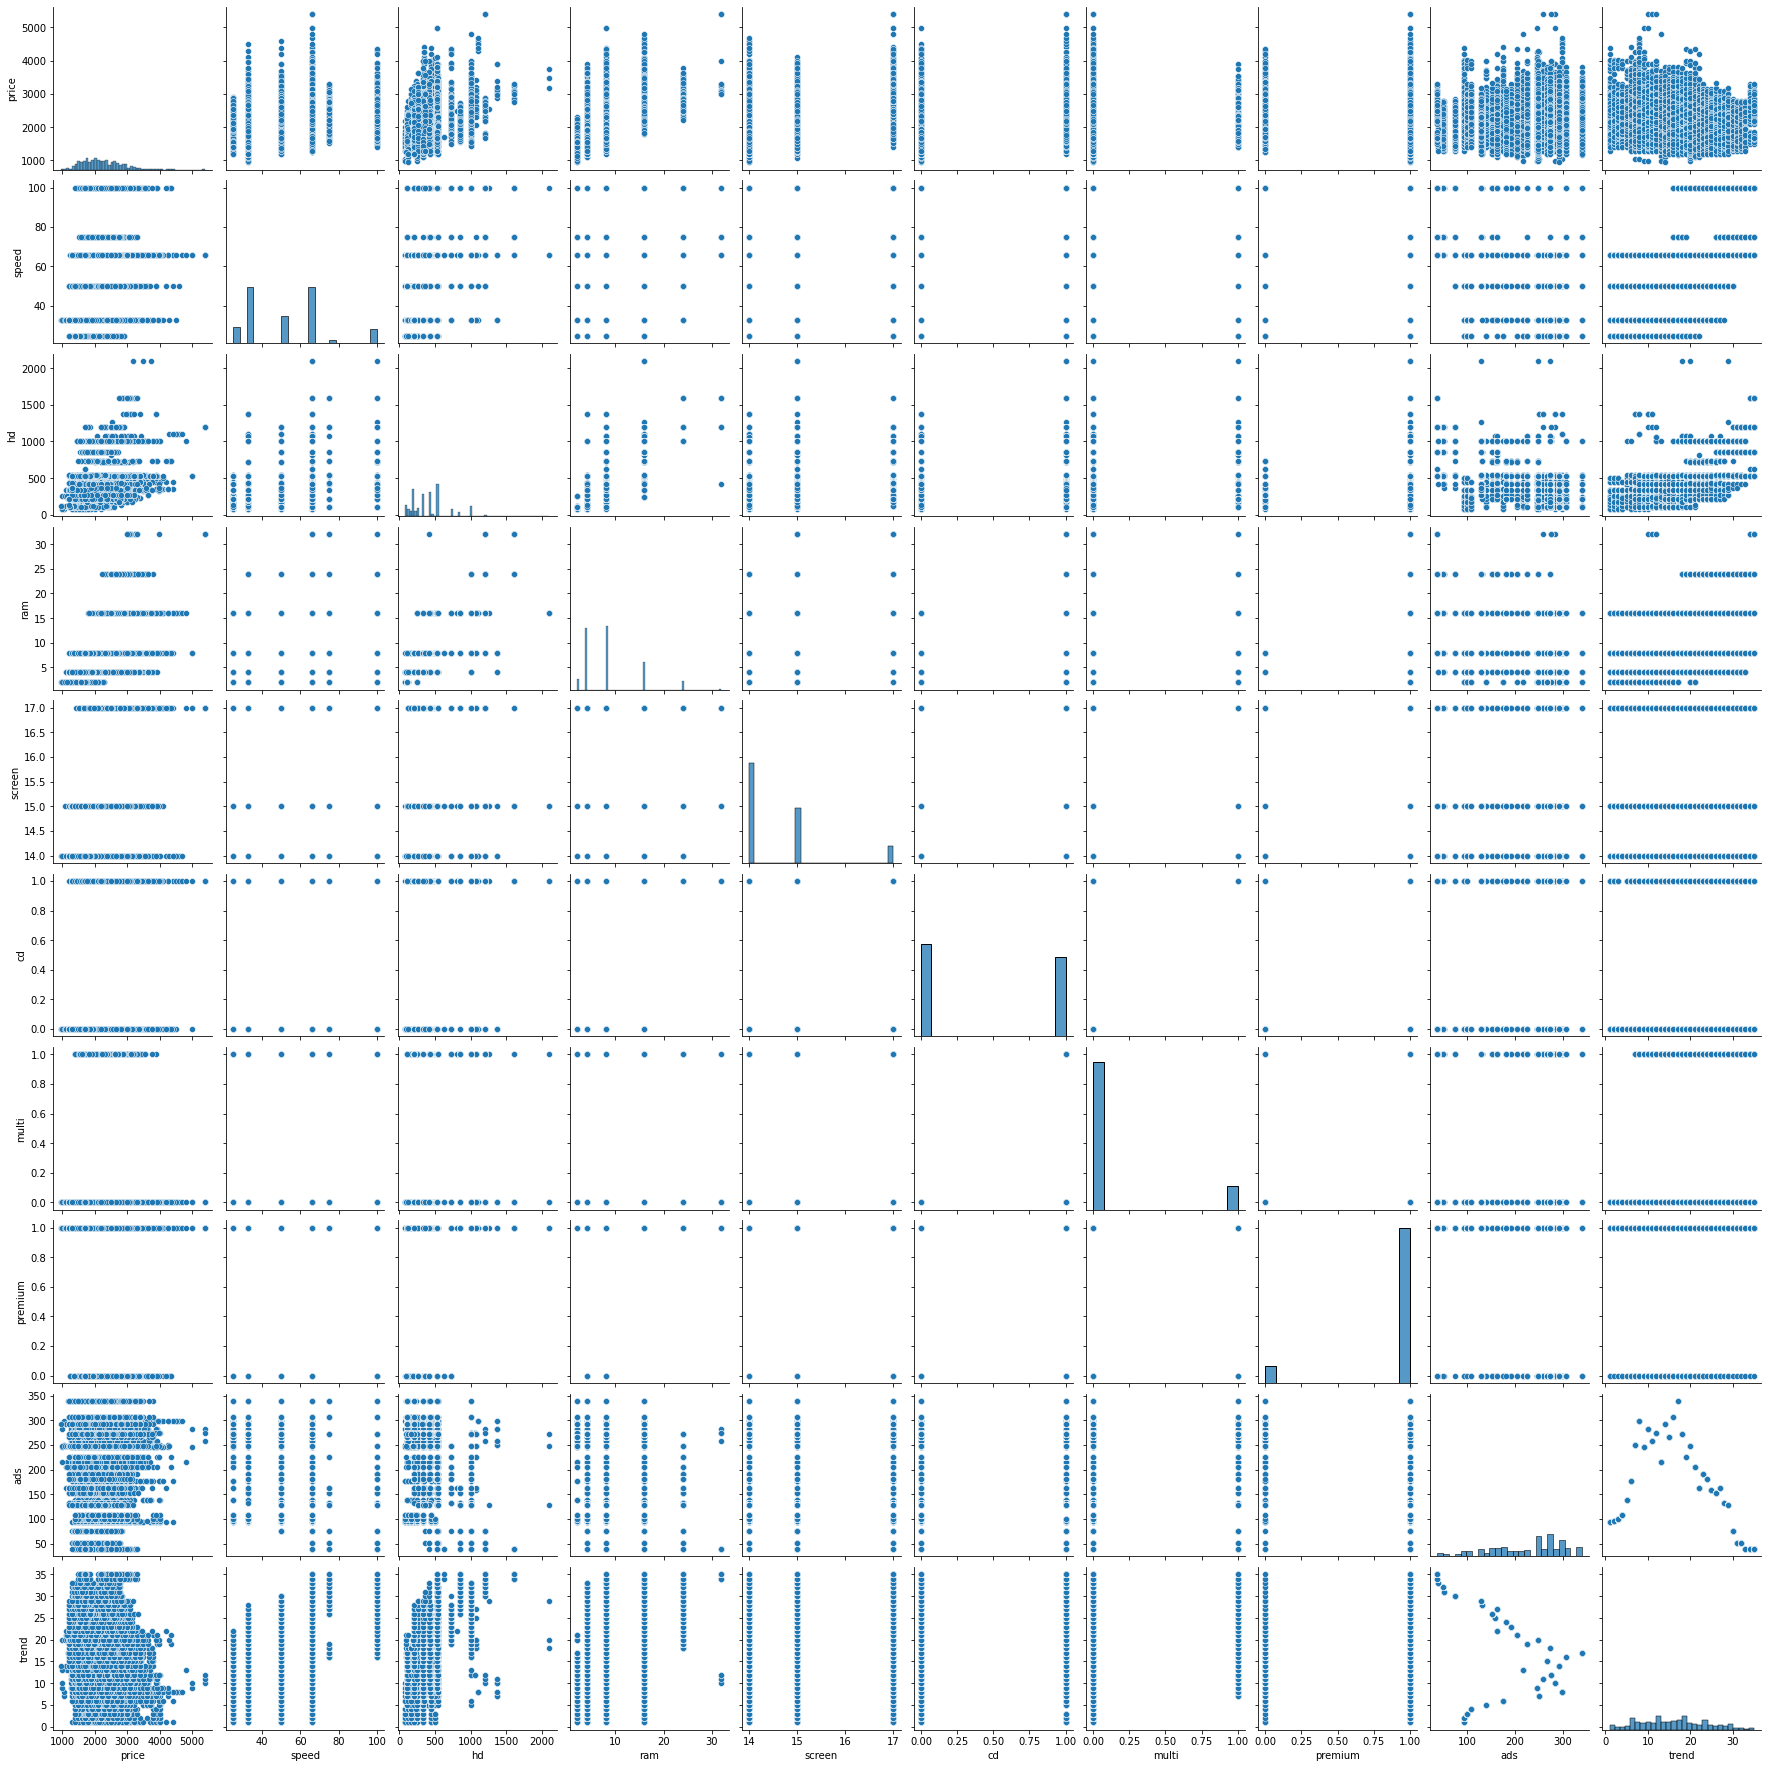

In [63]:
# Sctter plot and histogram between variables
sns.pairplot(df) # no multicolinearity issue

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df.iloc[:,1:])

In [79]:
scaled

array([[0.        , 0.        , 0.06666667, ..., 1.        , 0.18333333,
        0.        ],
       [0.10666667, 0.00247525, 0.        , ..., 1.        , 0.18333333,
        0.        ],
       [0.        , 0.04455446, 0.06666667, ..., 1.        , 0.18333333,
        0.        ],
       ...,
       [1.        , 0.55445545, 0.73333333, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.38118812, 0.46666667, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.38118812, 0.46666667, ..., 1.        , 0.        ,
        1.        ]])

In [80]:
df.iloc[:2,1:]

,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,25,80,4,14,0,0,1,94,1
1,33,85,2,14,0,0,1,94,1


In [81]:
X=scaled ## independent features
y=df.iloc[:,0] ## dependent features

## Linear Regression


In [90]:
#without cross validation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
model = LinearRegression()
results = model.fit(X,y)
   
# predicting the test set results
y_pred = model.predict(X)

print('r2_score = ',r2_score(y, y_pred))
print('mean_squared_error = ',mean_squared_error(y, y_pred))

r2_score =  0.7752533525648956
mean_squared_error =  76125.79081701742


In [92]:
#with cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
rsquare=cross_val_score(lin_regressor,X,y,cv=5,scoring='r2')
rmse=cross_val_score(lin_regressor,X,y,cv=5,scoring='neg_mean_squared_error')
mean_rsquare=np.mean(rsquare)
mean_rmse=-np.mean(rmse)
print('mean_rsquare = ',mean_rsquare)
print('mean_rmse = ',mean_rmse)

mean_rsquare =  0.6802516261735816
mean_rmse =  98834.38151426995


## Ridge Regression

In [100]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,cv=5,scoring='r2')
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='r2')

In [107]:
print('best param = ',ridge_regressor.best_params_)
print('mean_rsquare = ',ridge_regressor.best_score_)

best param =  {'alpha': 5}
mean_rsquare =  0.6829641348579176


## Lasso Regression

In [109]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,cv=5,scoring='r2')

lasso_regressor.fit(X,y)
print('best param = ',lasso_regressor.best_params_)
print('mean_rsquare = ',lasso_regressor.best_score_)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.211e+08, tolerance: 1.587e+05
  model = cd_fast.enet_coordinate_descent(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.580e+08, tolerance: 1.630e+05
  model = cd_fast.enet_coordinate_descent(
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

best param =  {'alpha': 1e-15}
mean_rsquare =  0.6802516261735829


c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+08, tolerance: 2.094e+05
  model = cd_fast.enet_coordinate_descent(


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [87]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

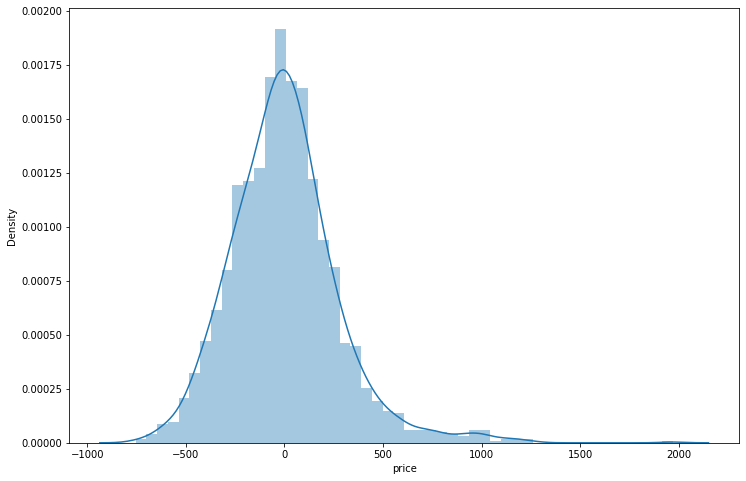

In [88]:
import seaborn as sns

sns.distplot(y_test-prediction_lasso)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

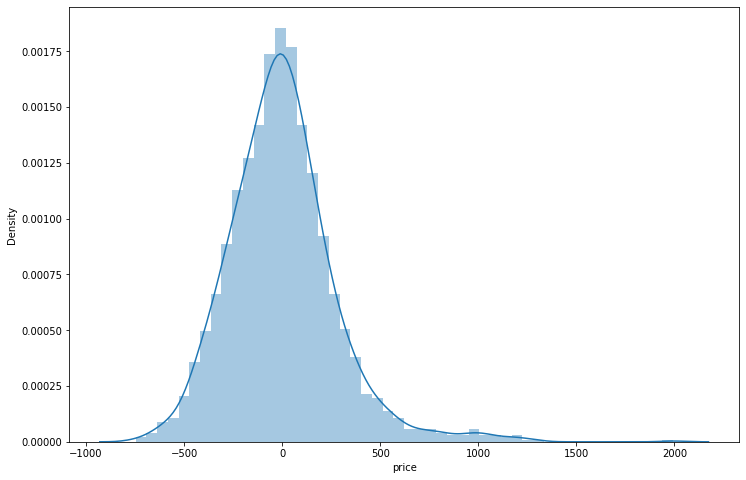

In [89]:
import seaborn as sns

sns.distplot(y_test-prediction_ridge)